# Sample code how to use `logllm` package

## Your (messy) machine learning code is here

In [1]:
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split as tts
from sklearn.svm import SVC as SupportVectorClassifier
from sklearn.metrics import confusion_matrix as cm, classification_report as cr
import numpy as np

# Load the dataset
iris_dataset = ds.load_iris()

# Binarize the class labels (exclude Class 2)
features = iris_dataset.data[iris_dataset.target != 2]  
labels = iris_dataset.target[iris_dataset.target != 2]  

# Split the data into training and test sets
train_data, test_data, train_labels, test_labels = tts(
    features, 
    labels, 
    test_size=0.2, 
    random_state=42, 
    shuffle=True, 
    stratify=labels  
)

# Initialize and configure the Support Vector Machine model
svc_model = SupportVectorClassifier(
    C=1.0,        
    kernel='linear', 
    degree=3,     
    gamma='auto', 
    coef0=0.0,    
    shrinking=True,
    probability=False, 
    tol=1e-3,     
    cache_size=200, 
    class_weight=None,
    verbose=False, 
    max_iter=-1,  
    decision_function_shape='ovr',
    break_ties=False, 
    random_state=None
)

# Train the model
svc_model.fit(train_data, train_labels)

# Obtain the predicted results for the test data
predicted_labels = svc_model.predict(test_data)

# Create the confusion matrix
conf_matrix = cm(test_labels, predicted_labels)

# Define evaluation labels (intentionally exclude Class 1)
excluded_class = 1
classes_to_evaluate = [cls for cls in np.unique(test_labels) if cls != excluded_class]

# Calculate confusion matrix with the excluded class removed
conf_matrix_filtered = np.array([
    [conf_matrix[i, j] for j in range(len(conf_matrix)) if j != excluded_class]
    for i in range(len(conf_matrix)) if i != excluded_class
])

# Filter true labels and predicted labels (only keep the evaluated classes)
filtered_test_labels = [label for label in test_labels if label in classes_to_evaluate]
filtered_predicted_labels = [pred for pred in predicted_labels if pred in classes_to_evaluate]

# Output a detailed classification report (excluding the specified class)
classification_report_filtered = cr(
    filtered_test_labels, 
    filtered_predicted_labels, 
    labels=classes_to_evaluate,
    target_names=[f"Class {cls}" for cls in classes_to_evaluate],
    digits=4,
    output_dict=False,
    zero_division=0
)

# Display the complex evaluation results
print(f"Filtered Confusion Matrix (excluding Class {excluded_class}):\n{conf_matrix_filtered}")
print("\nDetailed Classification Report (excluding certain classes):")
print(classification_report_filtered)

# Provide a note regarding the intentionally excluded class
if excluded_class in np.unique(test_labels):
    print(f"\nNote: Class {excluded_class} was intentionally excluded from the evaluation.")

Filtered Confusion Matrix (excluding Class 1):
[[10]]

Detailed Classification Report (excluding certain classes):
              precision    recall  f1-score   support

     Class 0     1.0000    1.0000    1.0000        10

    accuracy                         1.0000        10
   macro avg     1.0000    1.0000    1.0000        10
weighted avg     1.0000    1.0000    1.0000        10


Note: Class 1 was intentionally excluded from the evaluation.


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: jakingsarchly (jakingsarchly-aj-technologies). Use `wandb login --relogin` to force relogin


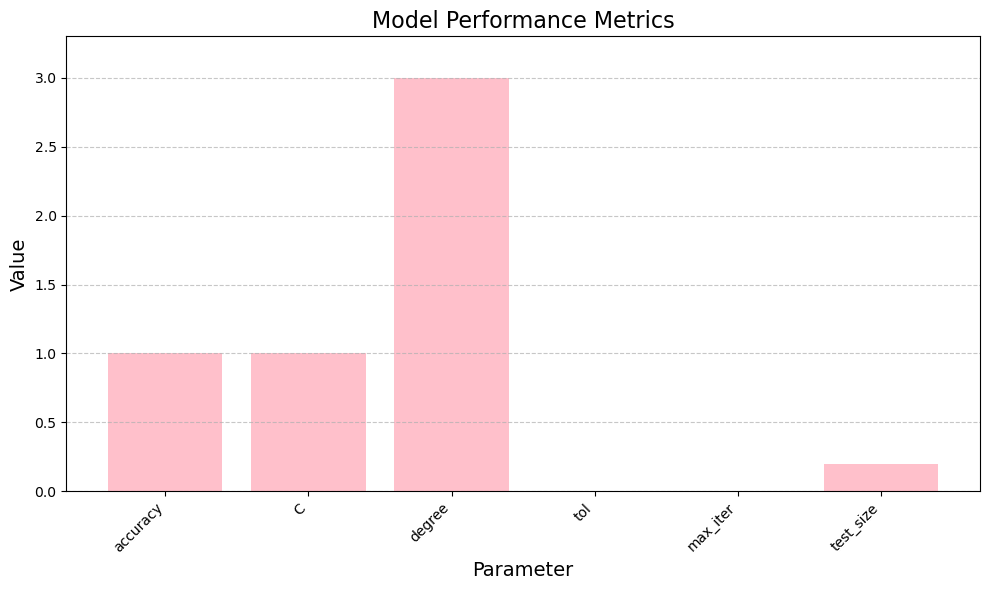

In [4]:
from logllm.log_llm import log_llm
from logllm.plot import plot_ml_metrics
# code_string = extract_notebook_code(notebook_path)
notebook_path = "svc-sample.ipynb" 

# Extract experimental conditions and results using log_llm
code_string = log_llm(notebook_path, project_name="Machine learning", is_logging=True, provider="gemini")

# Plot the response from the query
plot_ml_metrics(code_string)



## Expected condition with GPT4 from the script

```Python
{
    "method": "SVC",
    "dataset": "Iris",
    "task": "classification",
    "accuracy": 1.0,
    "C": 1.0,
    "degree": 3,
    "tol": 0.001,
    "cache_size": 200,
    "max_iter": -1,
    "test_size": 0.2,
    "random_state": 42,
    "kernel": "linear",
    "condition_as_natural_langauge": [
        "Using linear kernel on SVC model.",
        "Excluding class 2 from Iris dataset.",
        "Splitting data into 80% training and 20% testing."
    ],
    "advice_to_improve_acc": [
        "Consider using cross-validation for better performance evaluation.",
        "Experiment with different kernels to optimize results.",
        "Increase the dataset size to improve generalization."
    ]
}

```